In [1]:
from utility.types import AllocationMethodsEnum
from data.universe import Universe
from backtest.backtest import Backtester

In [2]:
universe_obj = Universe(
    index_universe="SPX Index", start_date="2019-01-01", end_date="2020-01-01"
)

In [7]:
d = universe_obj.get_returns_history_from_spinoff()
d

security,CTVA US Equity,CVET US Equity,DD UN Equity,DHR UN Equity,ELAN US Equity,FMC UN Equity,GE UN Equity,HSIC UW Equity,LLY UN Equity,LTHM US Equity,NVST US Equity
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,0.000000,0.000000,-0.036868,-0.028657,-0.022327,-0.027575,0.001241,-0.034300,-0.031076,-0.028592,0.000000
2019-01-04,0.000000,0.000000,0.042277,0.028990,0.023802,0.052878,0.021092,0.009909,0.030096,0.049301,0.000000
2019-01-07,0.000000,0.000000,0.000548,0.004081,0.025762,0.011709,0.061969,-0.004709,0.005407,0.009818,0.000000
2019-01-08,0.000000,0.000000,0.011505,0.025481,-0.004288,0.017232,-0.020596,0.016464,0.009195,-0.003472,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,0.005234,-0.015475,-0.002190,0.000652,0.012384,0.006583,0.002687,0.002260,-0.000305,0.008074,0.015884
2019-12-26,0.013190,-0.014970,-0.000784,-0.003391,-0.009174,0.005648,0.003576,-0.003908,0.000229,0.003432,-0.015635
2019-12-27,-0.001713,-0.039514,0.000000,0.000393,0.006173,-0.003547,-0.004453,0.004678,0.002898,-0.012543,0.014194
2019-12-30,-0.009609,0.018196,-0.022595,-0.000262,-0.001704,-0.018887,-0.008943,-0.002103,-0.001673,-0.012702,-0.024325


In [9]:
bk_test = Backtester(universe_obj=universe_obj)


-------  Returns statistical information  --------
Overall performance: -0.30 % vs 22.38 % (benchmark)
Expected return annualized: 1.91 % vs 21.89 % (benchmark)
CAGR: 1.34 % vs 21.63 % (benchmark)
Expected volatility annualized: 21.17 % vs 11.65 % (benchmark)
Expected volatility monthly: 6.11 % vs 3.36 % (benchmark)
Expected volatility daily: 1.33 % vs 0.73 % (benchmark)
Specific volatility (diversifiable) annualized: 18.08 %
Systematic volatility annualized: 11.00 %
Skewness: 0.19 vs -0.89 (benchmark), <0 = left tail, >0 = right tail
Kurtosis: 3.41 vs -0.89 (benchmark) , >3 = fat tails, <3 = thin tails
95%-VaR: -1.87 % vs -1.09 % (benchmark) -> the lower the better
95%-CVaR: -3.13 % vs -1.90 % (benchmark) -> the lower the better

-------  Strategy statistical information  -------
Max drawdown: -15.78 % vs -6.84 % (benchmark)
Kelly criterion: 0.79 % vs 16.60 % (benchmark)
Benchmark sensitivity (beta): -0.94 vs 1 (benchmark)
Determination coefficient R²: 0.27
Tracking error annualized:

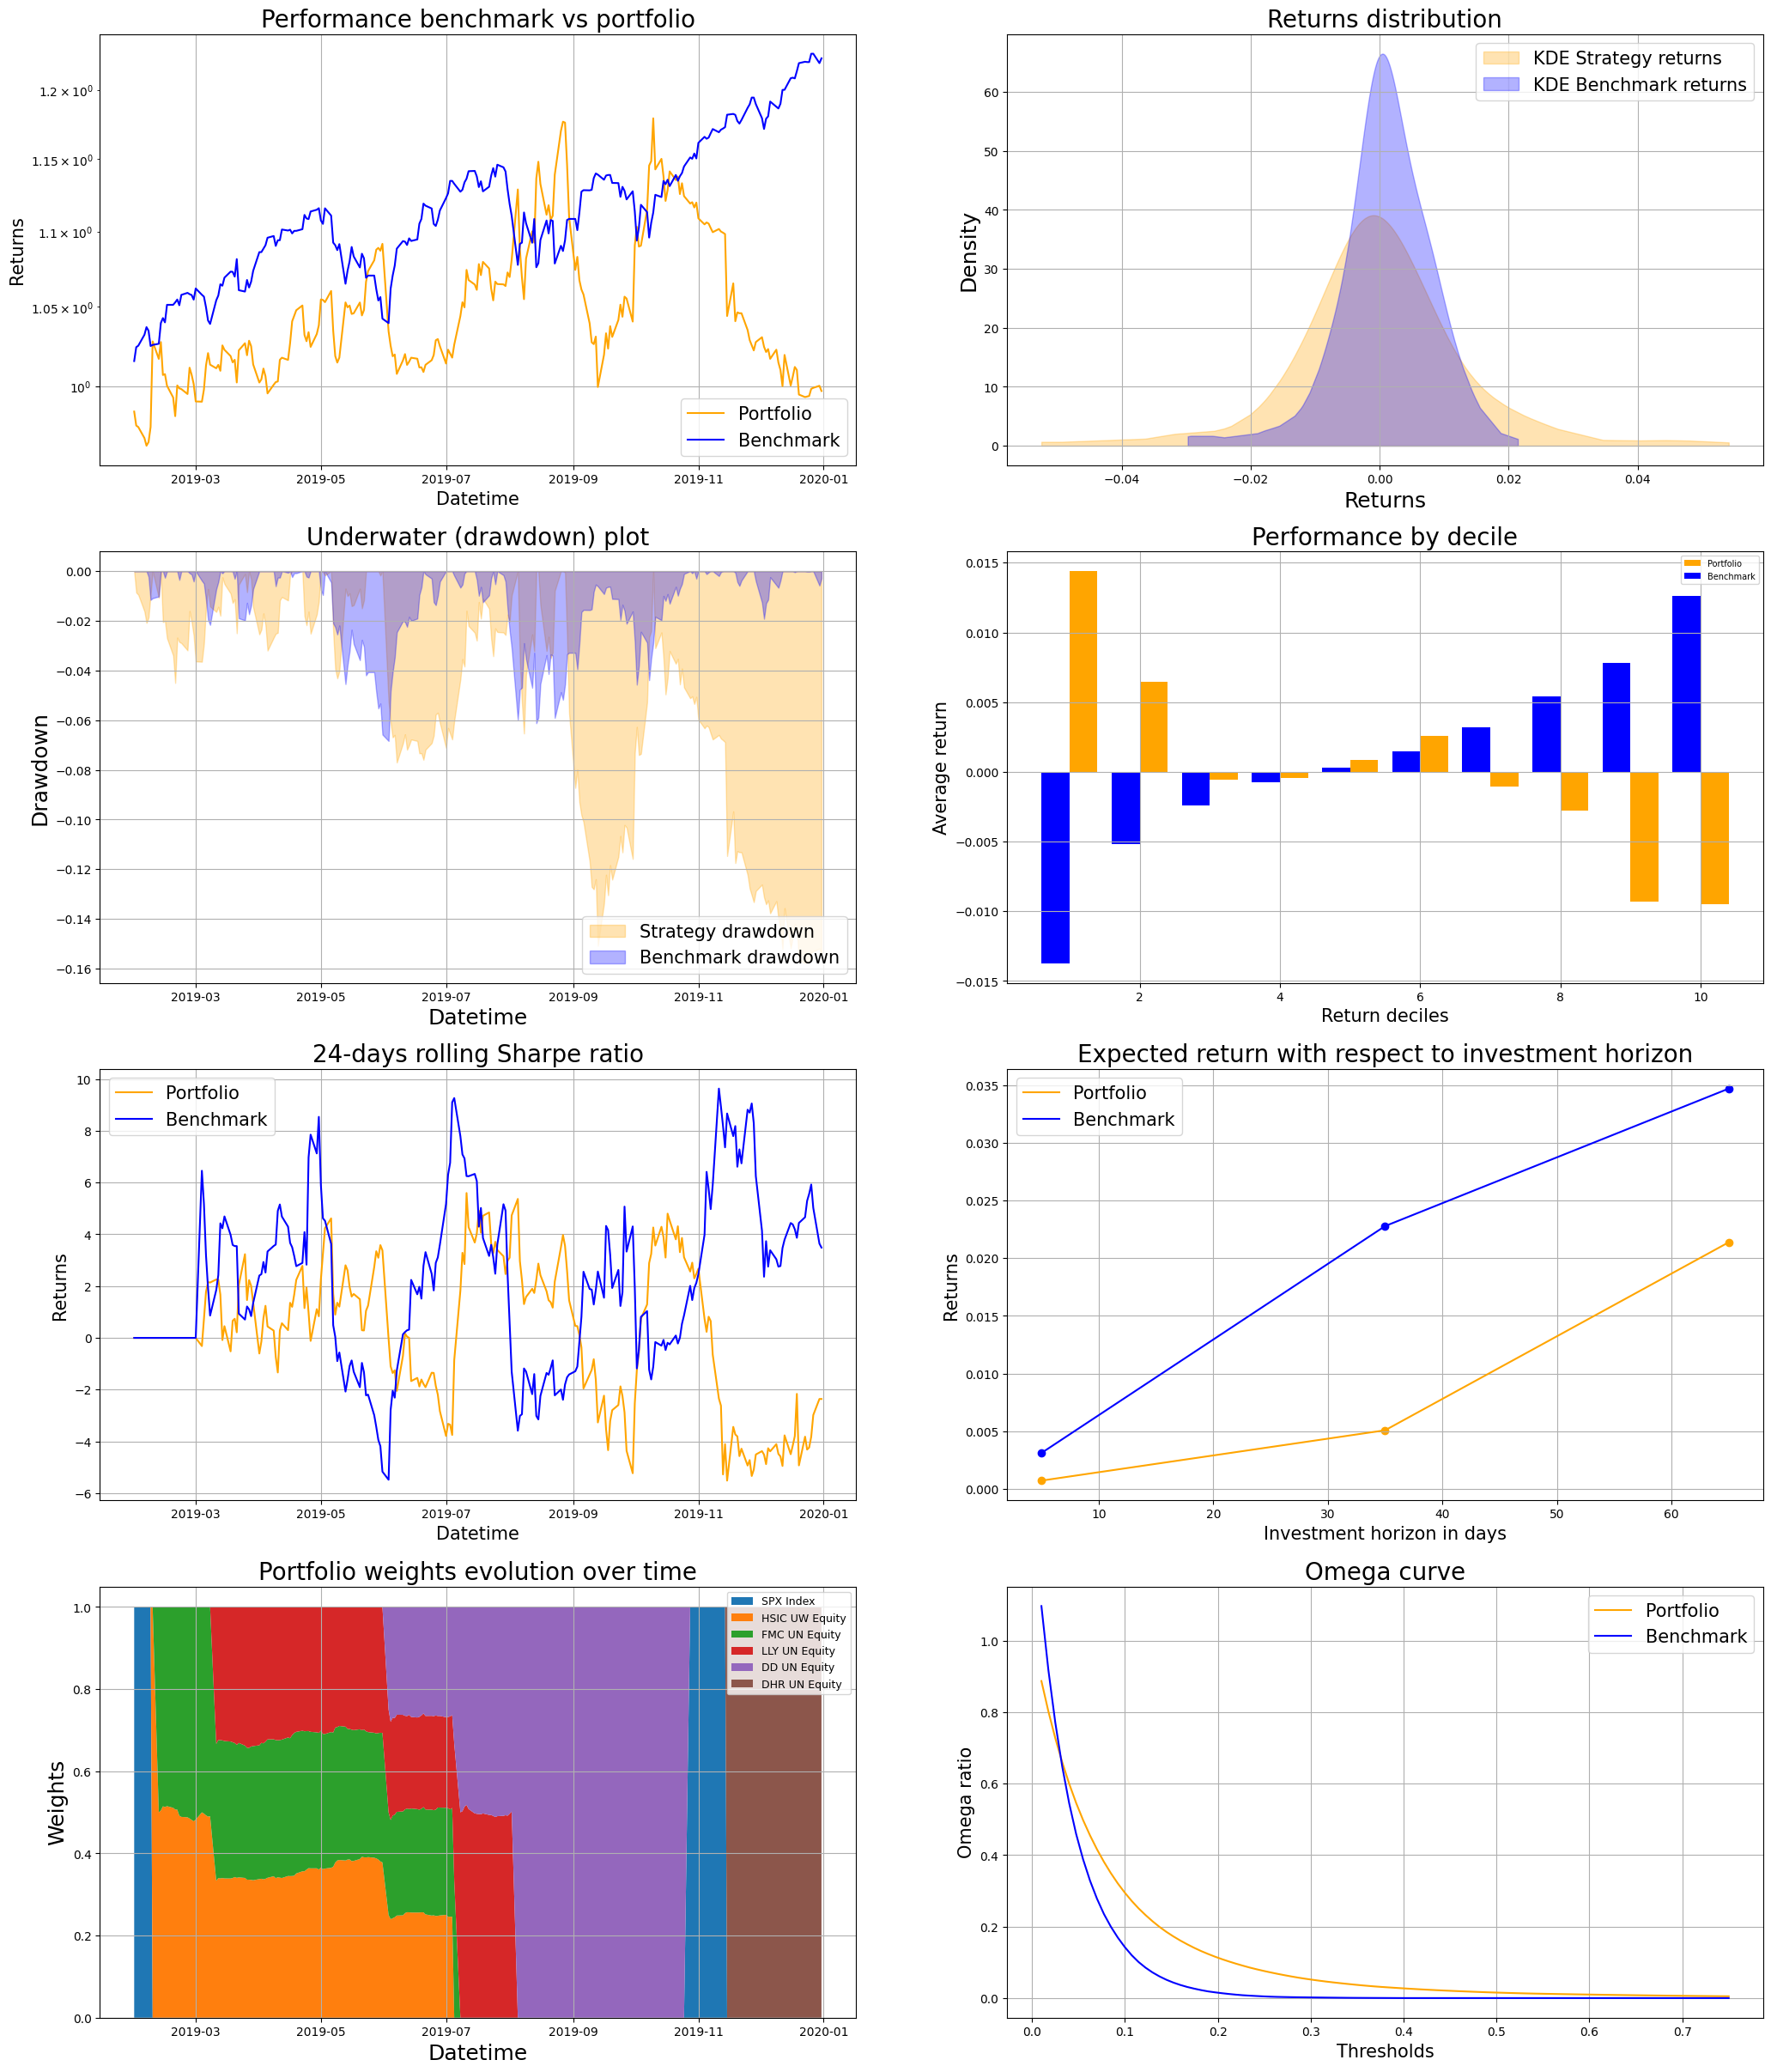

In [10]:
ptf_and_bench, ptf_weights_df, ptf_metrics_df = bk_test.run_backtest(
    allocation_type=AllocationMethodsEnum.EQUALLY_WEIGHTED,
    backtest_type="parents",
    holding_period_in_months=5,
    transaction_cost=0.001,  # 10 BP
    position_type = "short",
    plot_performance=True,
    verbose=False,
)

In [11]:
import pandas as pd

last_weights = ptf_weights_df.iloc[-1]

PORT_WEIGHTS = pd.DataFrame({
              "TICKER":last_weights.index,
              "QUANTITY":last_weights.values})

PORT_WEIGHTS['DATE'] = last_weights.name

PORT_WEIGHTS.to_excel(f"./PORT_WEIGHTS_{last_weights.name.date()}.xlsx",index=False)
PORT_WEIGHTS

SPX Index         0.0
HSIC UW Equity    0.0
FMC UN Equity     0.0
LLY UN Equity     0.0
DD UN Equity      0.0
DHR UN Equity     1.0
Name: 2019-12-31 00:00:00, dtype: float64

# Parent behaviour


In [8]:
from utility.utils import wrangle_spin_off_dataframe
from backtest.analysis import get_spin_off_parent_behavior
import numpy as np

spin_off_announcement = wrangle_spin_off_dataframe(universe_obj.get_spin_off_history())
spin_off_announcement

{datetime.date(2015, 12, 11): [SpinOff(parent_company='DD UN Equity', subsidiary_company='CTVA US Equity', spin_off_ex_date=datetime.date(2019, 6, 3))],
 datetime.date(2019, 11, 15): [SpinOff(parent_company='DHR UN Equity', subsidiary_company='NVST US Equity', spin_off_ex_date=datetime.date(2019, 12, 16))],
 datetime.date(2019, 2, 11): [SpinOff(parent_company='FMC UN Equity', subsidiary_company='LTHM US Equity', spin_off_ex_date=datetime.date(2019, 3, 4))],
 datetime.date(2018, 5, 21): [SpinOff(parent_company='GE UN Equity', subsidiary_company='1693496D US Equity', spin_off_ex_date=datetime.date(2019, 2, 26))],
 datetime.date(2018, 4, 23): [SpinOff(parent_company='HSIC UW Equity', subsidiary_company='CVET US Equity', spin_off_ex_date=datetime.date(2019, 2, 8))],
 datetime.date(2018, 7, 24): [SpinOff(parent_company='LLY UN Equity', subsidiary_company='ELAN US Equity', spin_off_ex_date=datetime.date(2019, 3, 11))]}

In [9]:
DAYS_BEFORE = 50
DAYS_AFTER = 50

behaviours = []

for spinoffs in spin_off_announcement.values():
    for spinoff in spinoffs:
        result = get_spin_off_parent_behavior(
            universe_obj.get_returns_history_from_spinoff(),
            spinoff,
            DAYS_BEFORE,
            DAYS_AFTER,
        )
        if result.shape[0] != 0 and result.shape[0] == DAYS_AFTER + DAYS_BEFORE:
            behaviours.append(result)

behaviours = np.array(behaviours)

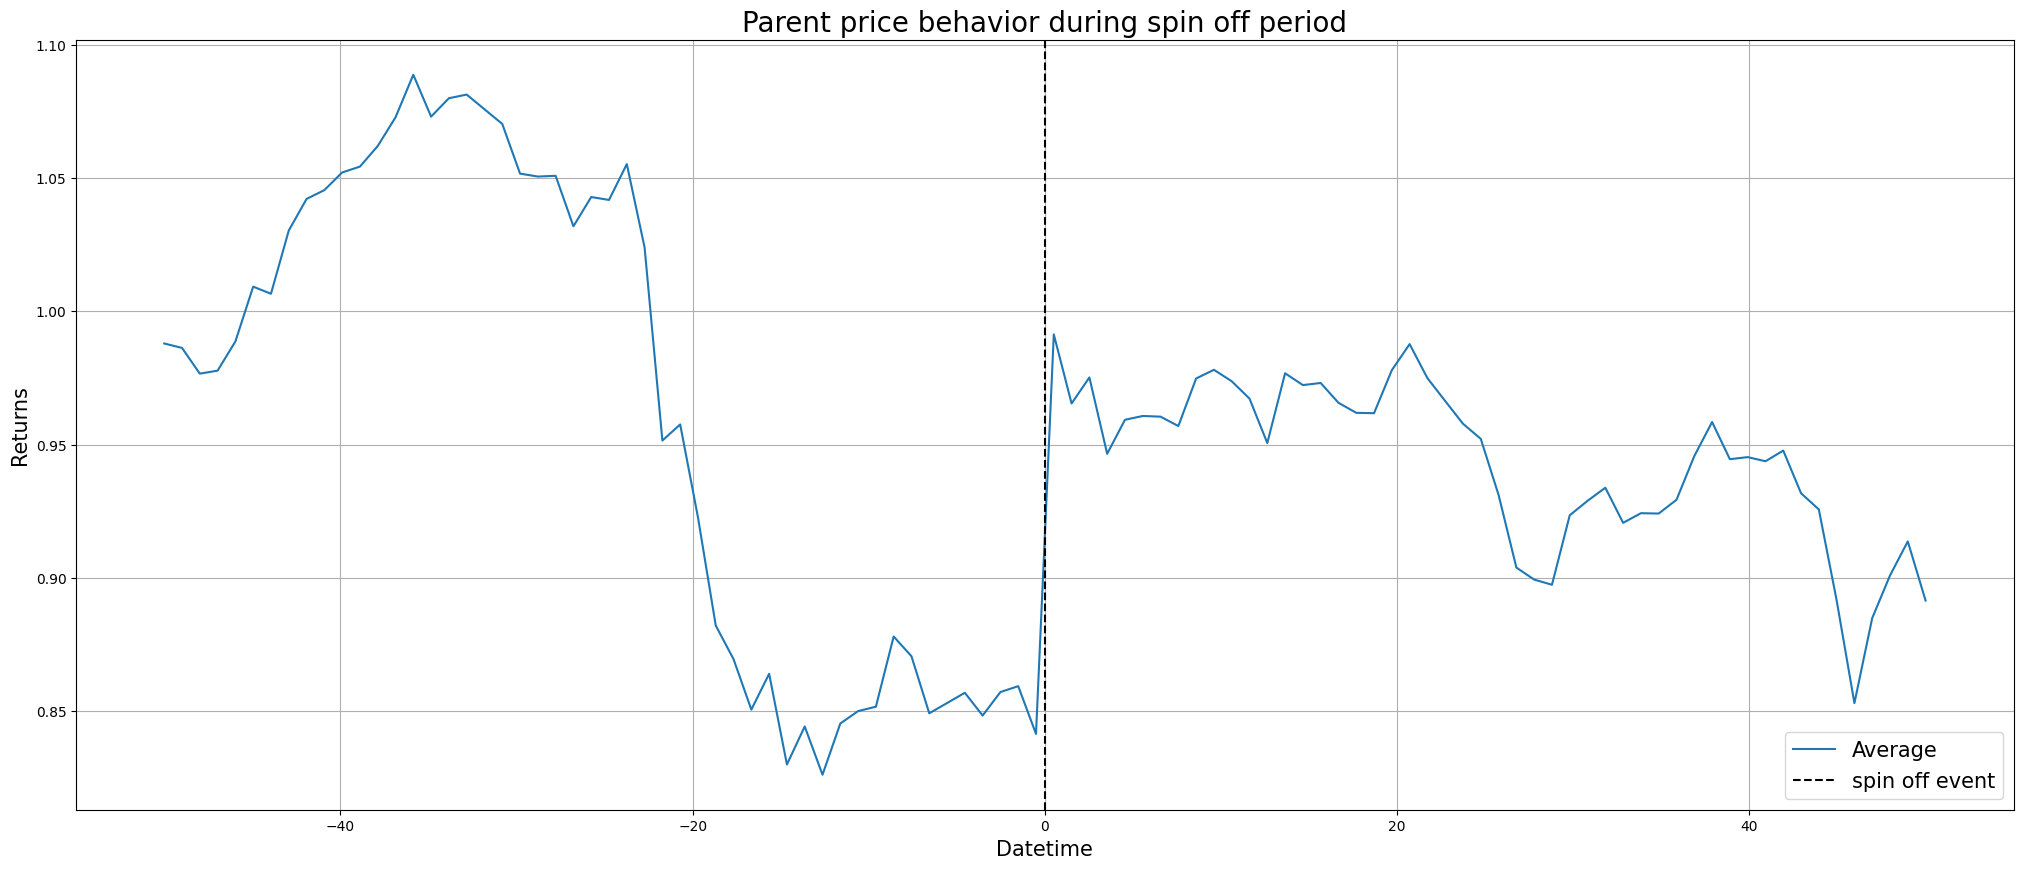

In [10]:
from matplotlib import pyplot as plt

_, ax = plt.subplots(1, 1, figsize=(25, 10))

ax.plot(
    np.linspace(-DAYS_BEFORE, DAYS_AFTER, num=DAYS_BEFORE + DAYS_AFTER),
    np.mean(behaviours, axis=0),
    label="Average",
)
ax.axvline(x=0, color="black", label="spin off event", linestyle="--")
ax.grid()
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Returns", fontsize=15)
ax.set_title(f"Parent price behavior during spin off period", fontsize=20)
ax.legend(loc="lower right", fontsize=15)